## Goal

This repo is my work to analize the California Housing data. This data is imported from sklearn and the input has 8 varaibles, 20640 samples. 

Todo: why after removing outliers the performance becomes worse? (see the section of least square regression)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb

## Data 

### fetching data and explore it

In [2]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In [3]:
pd.DataFrame(X).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

No missing values! Ya!

In [4]:
houses = fetch_california_housing()
print(houses.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
houses.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7
0,7.3003,19.0,7.961600,1.137600,1926.0,3.081600,38.46,-122.68
1,5.9547,18.0,6.547325,1.102881,547.0,2.251029,32.95,-117.24
2,3.2125,19.0,5.207547,1.216981,314.0,2.962264,34.68,-118.27
3,6.9930,13.0,6.428571,1.000000,120.0,2.857143,33.51,-117.18
4,2.5162,21.0,4.429348,1.036685,1735.0,2.357337,38.62,-121.41


In [8]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7
0,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
1,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
2,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
3,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
4,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43


In [9]:
pd.DataFrame(y_train).head()

,0
0,3.81300
1,3.29300
2,1.85400
3,5.00001
4,0.97500


In [10]:
pd.DataFrame(y_test).head()

,0
0,1.369
1,2.413
2,2.007
3,0.725
4,4.600


## Data Wrangling

### Visualization

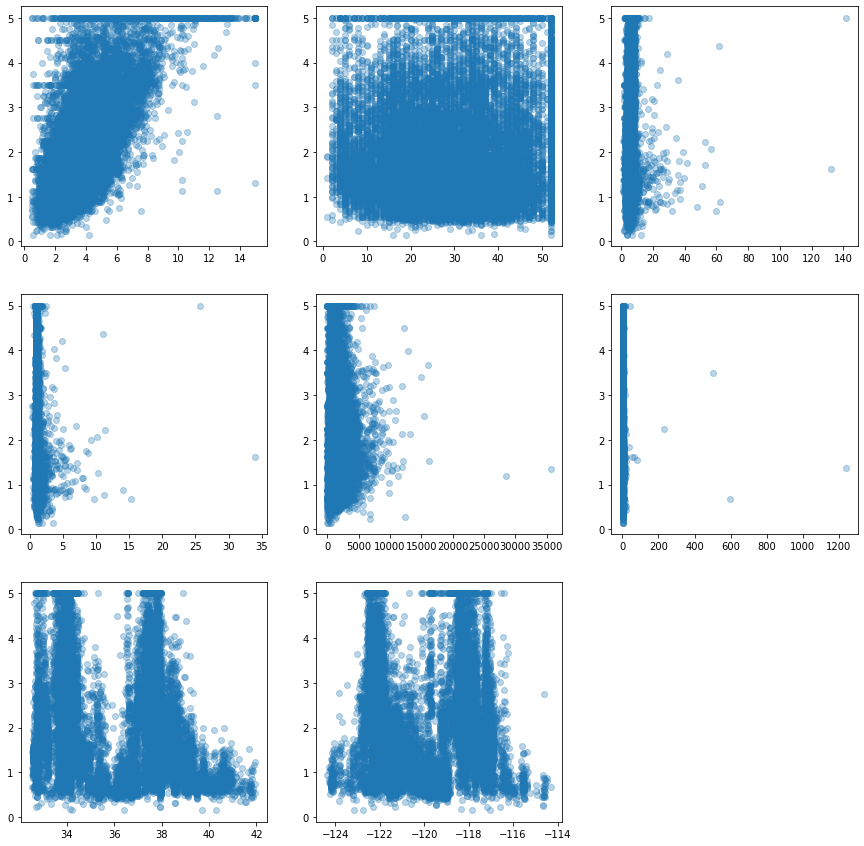

In [11]:
plt.figure(figsize = [15, 15])
for i in range(8):    
    plt.subplot(3,3,i + 1)
    plt.scatter(X[:,i], y, alpha = 0.3);

There are some outliers to be removed.

### Remove Outliers

In [12]:
mask = (X_train[:, 2] < 25) & (X_train[:, 3] < 5) & (X_train[:, 4] < 9000) & (X_train[:, 5] < 15) 
X_train_ro = X_train[mask]
y_train_ro = y_train[mask]

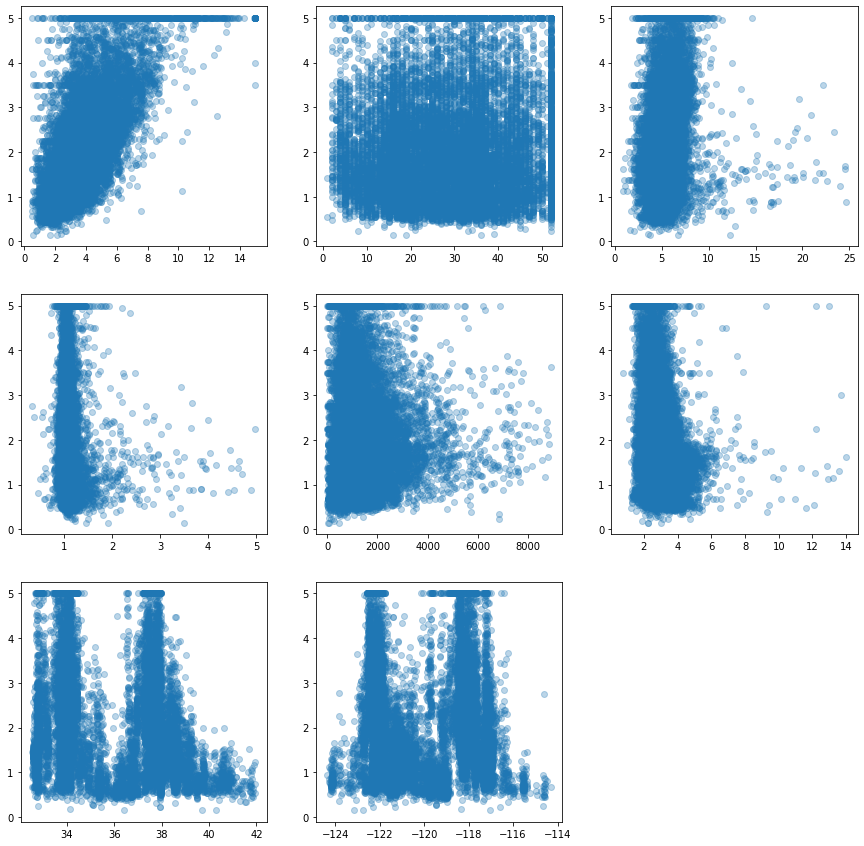

In [13]:
plt.figure(figsize = [15, 15])
for i in range(8):    
    plt.subplot(3,3,i + 1)
    plt.scatter(X_train_ro[:,i], y_train_ro, alpha = 0.3);

### Feature selection

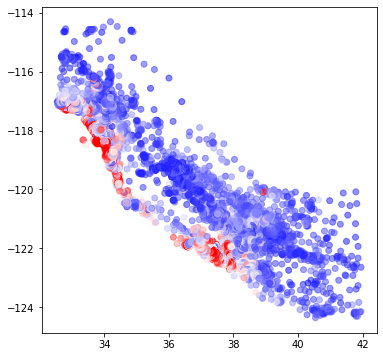

In [14]:
plt.figure(figsize = [6, 6])
plt.scatter(x = X[:,6], y = X[:,7], c = y, cmap = 'bwr', alpha = 0.5);

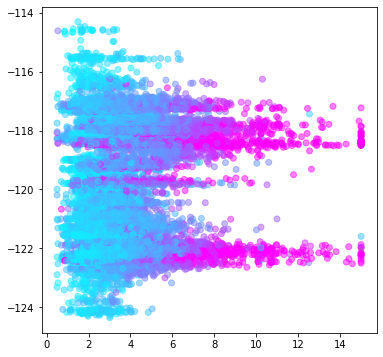

In [15]:
plt.figure(figsize = [6,6])
plt.scatter(x = X[:,0], y = X[:,7], c = y, cmap = 'cool', alpha = 0.5);

This two features looks particularly relevant. But I don't know how to use them..

### Scale data

The mean and standard deviation of X_train and y_train (after removing outliers) to scale (X_train, y_train), and (X_test, y_test). 

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_ro)
scaled_X_train_ro = scaler.transform(X_train_ro)
scaled_X_test_ro = scaler.transform(X_test)

### PCA

In [18]:
from sklearn.decomposition import PCA  # 1. Choose the model class
pca = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
pca.fit(scaled_X_train)                      # 3. Fit to data. Notice y is not specified!
X_2D = pd.DataFrame(pca.transform(scaled_X_train))    
X_2D.columns = ['x', 'y']
X_2D['target'] = y_train 

In [19]:
X_2D

,x,y,target
0,2.070559,0.219775,3.81300
1,-1.019779,1.526785,3.29300
2,-0.429743,0.496273,1.85400
3,-0.897614,1.504367,5.00001
4,1.016365,-1.109678,0.97500
...,...,...,...
15475,1.353261,-0.495819,1.44600
15476,0.831055,-0.896327,1.59400
15477,0.612357,-1.369082,2.89300
15478,-1.041845,0.473004,4.84600


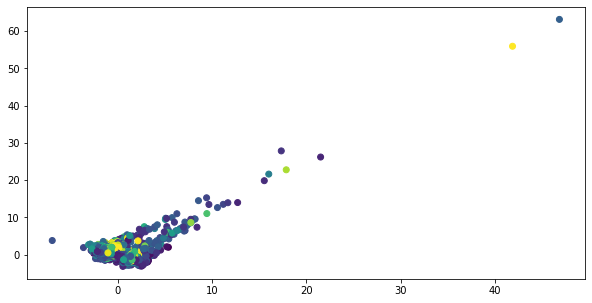

In [20]:
plt.figure(figsize = [10,5])
plt.scatter(X_2D['x'], X_2D['y'],  c= X_2D['target']);

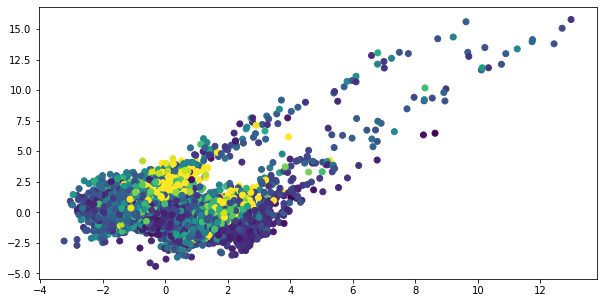

In [21]:
## For data after removing outliers
from sklearn.decomposition import PCA  # 1. Choose the model class
pca = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
pca.fit(scaled_X_train)                      # 3. Fit to data. Notice y is not specified!
X_2D = pd.DataFrame(pca.transform(scaled_X_train_ro))    
X_2D.columns = ['x', 'y']
X_2D['target'] = y_train_ro 
plt.figure(figsize = [10,5])
plt.scatter(X_2D['x'], X_2D['y'],  c= X_2D['target']);

I don't see any linear trend....

## Regression

### least square regression

In [22]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train) 
reg.score(X_test, y_test)

0.5911695436410489

In [23]:
print(reg.coef_, reg.intercept_)

[ 4.39091042e-01  9.59864665e-03 -1.03311173e-01  6.16730152e-01
 -7.63275197e-06 -4.48838256e-03 -4.17353284e-01 -4.30614462e-01] -36.60959377871434


In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg.predict(X_test))

0.5404128061709079

In [25]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train_ro, y_train_ro) 
reg.score(X_test, y_test)

-17.93349503516733

In [26]:
print(reg.coef_, reg.intercept_)

[ 4.37496649e-01  1.10597146e-02 -1.10578919e-01  8.67761522e-01
  3.31884228e-05 -2.89843478e-01 -4.29240608e-01 -4.26653094e-01] -35.202171053846534


In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg.predict(X_test))

25.02725279741431

### Ridge (with regulation)

In [28]:
from sklearn import linear_model
regr = linear_model.Ridge(alpha=.8)
regr.fit(X_train, y_train) 
regr.score(X_test, y_test)

0.5911631871674543

In [29]:
print(regr.coef_, regr.intercept_)

[ 4.38990693e-01  9.60041981e-03 -1.03119622e-01  6.15731662e-01
 -7.62489684e-06 -4.48907081e-03 -4.17336650e-01 -4.30584102e-01] -36.60617384709888


### Ridge CV

In [30]:
regCV = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
regCV.fit(X_train, y_train) 
regCV.alpha_

100.0

In [31]:
regCV.score(X_test, y_test)

0.5902139854419727

In [32]:
print(regCV.coef_, regCV.intercept_)

[ 4.28788453e-01  9.81023916e-03 -8.35197421e-02  5.12996429e-01
 -6.71088037e-06 -4.56619104e-03 -4.14062422e-01 -4.25798745e-01] -36.11210783221657


### Lasso CV

In [33]:
lasso = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))
lasso.fit(X_train, y_train) 
lasso.alpha_

0.001

In [34]:
lasso.score(X_test, y_test)

0.5909148034876629

In [35]:
print(lasso.coef_, lasso.intercept_)

[ 4.35430588e-01  9.66949146e-03 -9.62719961e-02  5.80564052e-01
 -7.30927570e-06 -4.49333892e-03 -4.16183481e-01 -4.28903173e-01] -36.43356070219319


## Polynomial features

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [37]:
lm_2 = Pipeline([
    ("normalizer", StandardScaler()),
    ("poli-feature", PolynomialFeatures(degree=2)),
    ("regressor", LinearRegression())
])

In [38]:
lm_2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('normalizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poli-feature',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [39]:
lm_3 = Pipeline([
    ("normalizer", StandardScaler()),
    ("poli-feature", PolynomialFeatures(degree=3)),
    ("regressor", LinearRegression())
])
lm_3.fit(X_train, y_train)
lm_3.score(X_test, y_test)

-220409.53168153754

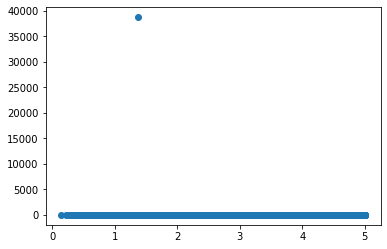

In [40]:
plt.scatter(y_test, lm_3.predict(X_test));

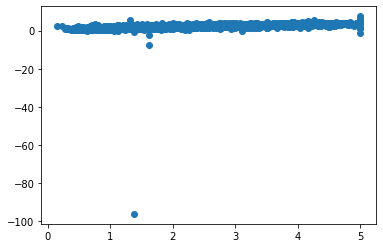

In [41]:
plt.scatter(y_test, lm_2.predict(X_test));

## RandomForestRegressor + RandomizedSearchCV

### For original data

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [43]:
param_distributions = {'n_estimators': randint(2, 6), 'max_depth': randint(1, 12)}

In [44]:
np.ravel(y_train)

array([3.813, 3.293, 1.854, ..., 2.893, 4.846, 0.694])

In [45]:
search = RandomizedSearchCV(estimator=RandomForestRegressor(),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)
search.fit(X_train, np.ravel(y_train));

In [46]:
search.best_params_   ## For this case, the more the better

{'max_depth': 10, 'n_estimators': 5}

In [47]:
search.score(X_test, y_test)

0.743856703599993

### For scaled data

In [62]:
search = RandomizedSearchCV(estimator=RandomForestRegressor(),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)
search.fit(scaled_X_train, np.ravel(y_train));
search.score(X_test, y_test)

-3.9019525404344275

## SVR

In [48]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

First we need to standardlize the data by killing the mean and scale the standard deviation to 1. 

In [49]:
## check the mean is correct
np.apply_along_axis(np.mean, 0, scaled_X_train)

array([-1.66959183e-14, -8.76703246e-17,  3.55638573e-15,  5.96410661e-15,
        9.20308905e-17, -2.02720413e-15,  4.19569059e-14, -9.27382202e-14])

It's normal that those mean are not exactly 0, because scaled_X_train and scaled_X_test are only part of the data so their mean will be close to 0 and std will be almost 1 but not exactly. 

### Use Linear Kernel

In [50]:
svr = SVR(C = 5, kernel = 'linear')
svr.fit(scaled_X_train, y_train)
y_pred = svr.predict(scaled_X_test)

In [51]:
print(svr.score(scaled_X_test, y_test), r2_score(y_test, y_pred))

-2.568669608561489 -2.568669608561489


In [52]:
svr = SVR(C = 1, kernel = 'linear')
svr.fit(scaled_X_train, y_train)
y_pred = svr.predict(scaled_X_test)

In [53]:
print(svr.score(scaled_X_test, y_test), r2_score(y_test, y_pred))

-2.5514591714480774 -2.5514591714480774


### Use Gaussian Kernel

In [54]:
svr = SVR(C = 0.1, kernel = 'rbf')
svr.fit(scaled_X_train, y_train)
svr.score(scaled_X_test, y_test)

0.7009888782699806

In [55]:
svr = SVR(kernel = 'rbf')
svr.fit(scaled_X_train, y_train)
svr.score(scaled_X_test, y_test)

0.7440114286513022

In [56]:
svr = SVR(C = 5, kernel = 'rbf')
svr.fit(scaled_X_train, y_train)
svr.score(scaled_X_test, y_test)

0.7615492068654747

In [57]:
svr = SVR(C = 10, kernel = 'rbf')
svr.fit(scaled_X_train, y_train)
svr.score(scaled_X_test, y_test)

0.7661960389797197

In [58]:
svr = SVR(C = 100, kernel = 'rbf')
svr.fit(scaled_X_train, y_train)
svr.score(scaled_X_test, y_test)

0.769224284625879

In [59]:
svr = SVR(C = 300, kernel = 'rbf')
svr.fit(scaled_X_train, y_train)
svr.score(scaled_X_test, y_test)

0.764791456506356

In [60]:
svr = SVR(C = 500, kernel = 'rbf')
svr.fit(scaled_X_train, y_train)
svr.score(scaled_X_test, y_test)

0.7615857436340755

## Conclusion

In Section 3-5 of this repo we apply Naive Bayes, GMM clustering and Support vector machine methods with GridSeach on the iris data. The accuracy score of each method is

|   method | Regression | poly features| RandomForestRegressor | SVR(linear) | SVR(RGF)|
|    :-:   | :-         | -:           | -:                    |  -:         |      -: |
|accuracy_score (orig. data) | 0.59 | bad | 0.74|   -    |   - |
|accuracy_score (scaled data)|  -   | -   |  -3.90  | -2.55 | 0.77| 


SVR on scaled data is the winner!